# Image Segmentation using K-means

Image Size: (128, 128)


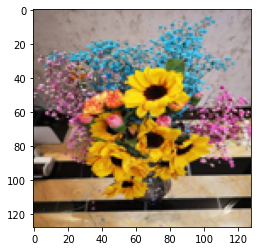

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

img = Image.open('datasets/flower.png')

# resize image
newSize = 128
img = img.resize((newSize , newSize))

print(f"Image Size: {img.size}")
plt.imshow(np.asarray(img))

# Using K-means

In [3]:
def compute_distance(point1, point2):
    '''
    Compute distance between two points

    Args:
        point1 : coordinate of point1
        point2 : coordinate of point2

    Returns:
        Distance between two points
    '''
    dim = point1.shape[0]
    dis = 0
    for i in range(dim):
        dis += (point1[i] - point2[i]) ** 2
    return dis ** (1/2)



def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """

    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    m = X.shape[0]
    for i in range(m):
        dis = []
        for j in range(K):
            dis.append(compute_distance(X[i , :] , centroids[j]))
        idx[i] = dis.index(min(dis))
    return idx



def compute_average(X, dataset):
    '''
    Given a set of points, find the average

    Args:
        X : dataset

    Retures:
        Average value
    '''
    size = len(X)
    if size == 0:
        return random.choice(dataset)
    size = float(size)
    avg = sum(X)

    return avg / size



def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    m, n = X.shape
    centroids = np.zeros((K, n))

    assignment_dic = {}
    for i in range(K):
        assignment_dic[i] = []

    for i , value in enumerate(idx):
        assignment_dic[value].append(X[i , :])

    for i in range(K):
        centroids[i , :] = compute_average(assignment_dic[i], X)

    return centroids


def run_K_means(X, K, maxIter = 10):
    '''
    run K means

    Args:
        X : dataset
        K : # of clusters
        maxIter : number of iterations

    Returns:
        centroids
        idx
    '''

    centroids = []
    for _ in range(K):
        centroids.append(random.choice(X))
    centroids = np.array(centroids)
    for _ in range(maxIter):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)

    return centroids , idx



In [4]:
def compress_image(original_img , K):
    # get original image data
    pixel_values = original_img.getdata()
    
    # get image size
    w, h = original_img.size

    # compute centroids
    centroids , indices = run_K_means(np.array(pixel_values), K)

    # compute pixel values for new image
    compressed_pixel_values = []
    for idx in indices:
        rgba = list(centroids[idx , :])
        for i , value in enumerate(rgba):
            rgba[i] = int(value)
        rgba = tuple(rgba)
        compressed_pixel_values.append(rgba)
    
    # convert to height x width x channel matrix
    res = []
    for i in range(h):
        row = []
        for j in range(w):
            row.append([compressed_pixel_values[i*128 + j][0] , 
                        compressed_pixel_values[i*128 + j][1] ,
                        compressed_pixel_values[i*128 + j][2]]) 
        res.append(row)
    
    return np.array(res)

(<matplotlib.image.AxesImage at 0x7f97d8fa9720>, Text(0.5, 1.0, 'K = 256'))

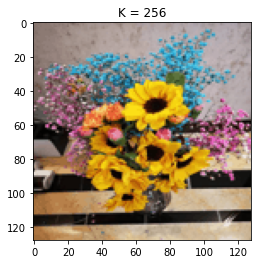

In [5]:
K = 256
compressed_img = compress_image(img, K)
plt.imshow(compressed_img) , plt.title("K = " + str(K))

(<matplotlib.image.AxesImage at 0x7f97e8201150>, Text(0.5, 1.0, 'K = 128'))

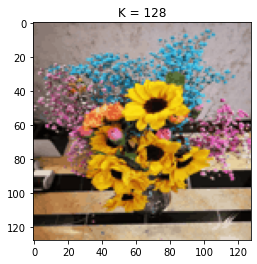

In [6]:
K = 128
compressed_img = compress_image(img, K)
plt.imshow(compressed_img) , plt.title("K = " + str(K))

(<matplotlib.image.AxesImage at 0x7f97d8fef010>, Text(0.5, 1.0, 'K = 64'))

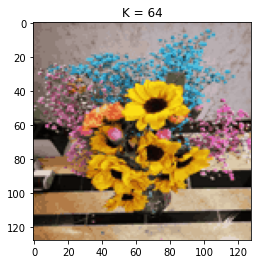

In [7]:
K = 64
compressed_img = compress_image(img, K)
plt.imshow(compressed_img) , plt.title("K = " + str(K))

(<matplotlib.image.AxesImage at 0x7f97e81cd8a0>, Text(0.5, 1.0, 'K = 32'))

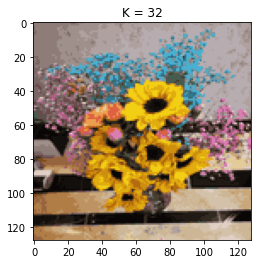

In [8]:
K = 32
compressed_img = compress_image(img, K)
plt.imshow(compressed_img) , plt.title("K = " + str(K))

(<matplotlib.image.AxesImage at 0x7f9819a70e80>, Text(0.5, 1.0, 'K = 16'))

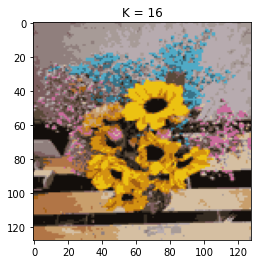

In [9]:
K = 16
compressed_img = compress_image(img, K)
plt.imshow(compressed_img) , plt.title("K = " + str(K))

(<matplotlib.image.AxesImage at 0x7f97e81ef040>, Text(0.5, 1.0, 'K = 8'))

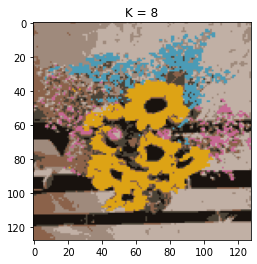

In [10]:
K = 8
compressed_img = compress_image(img, K)
plt.imshow(compressed_img) , plt.title("K = " + str(K))

(<matplotlib.image.AxesImage at 0x7f97d91a8c10>, Text(0.5, 1.0, 'K = 4'))

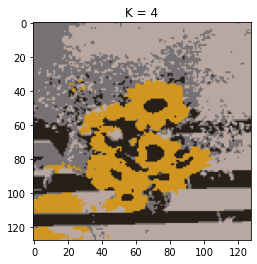

In [11]:
K = 4
compressed_img = compress_image(img, K)
plt.imshow(compressed_img) , plt.title("K = " + str(K))

(<matplotlib.image.AxesImage at 0x7f97d9198790>, Text(0.5, 1.0, 'K = 2'))

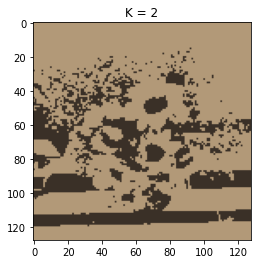

In [12]:
K = 2
compressed_img = compress_image(img, K)
plt.imshow(compressed_img) , plt.title("K = " + str(K))